<a href="https://colab.research.google.com/github/tomasmoshi/Student_Performance/blob/main/CSM148.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CS M148 Check-in:
## 1. Student Performance Factors
## 2. We will be using these metrics to make correlations on students success based on wide factors shown in the data set. This data has a variables that can base how a student does on an exam. There are many a differential values in shown in the data set and we want to use them to find correlations on how a students success can be tracked

# *Initial* Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder

# Import Dataset

In [ ]:
%pip install gdown
import gdown
file_id = "16BRBmYlV4juo1rlcIvKz6N5_ut6IRdQU"
url = f"https://drive.google.com/uc?id={file_id}"
out = "Student_Performance.csv"

gdown.download(url, out, quiet=False)
df = pd.read_csv(out)
df.head()


Downloading...
From: https://drive.google.com/uc?id=16BRBmYlV4juo1rlcIvKz6N5_ut6IRdQU
To: c:\Users\TM\Documents\GitHub\Student_Performance\Student_Performance.csv
100%|██████████| 642k/642k [00:00<00:00, 7.86MB/s]


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
# shows the total rows and finds if any are empty
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
# NOTE: Teacher quality has 6529 Non-Null values meaning about 78 rows have empty field values in there
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

### **4. Exploratory Data Analysis**

*  Ordinal Encoding: Parental_Involvement, Parental_Involvement, Motivation_Level, Family_Income, Teacher_Quality, Peer_Influence, Parental_Education_Level, Distance_from_Home
*  One-hot Encoding: School type, Gender
*  Binary Encoding: Extracurriculars, Internet access, Learning disabilities
*  Numerical: hours studied, attendance, sleep hours, previous scores, tutoring sessions, physical activity


In [6]:
df.shape

(6607, 20)

In [7]:
df.tail(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6597,16,91,High,Medium,Yes,6,72,High,Yes,0,High,High,Public,Negative,2,No,Postgraduate,Near,Female,70
6598,9,87,Low,Medium,Yes,6,64,Medium,Yes,1,High,Medium,Public,Neutral,2,No,High School,Near,Female,64
6599,30,94,Medium,Low,No,5,52,Low,No,3,High,Medium,Private,Neutral,2,No,Postgraduate,Moderate,Female,70
6600,12,98,Medium,Low,Yes,4,54,Medium,Yes,2,Medium,High,Private,Neutral,3,No,High School,Near,Female,67
6601,20,83,Medium,Low,No,6,51,Low,Yes,2,Medium,Medium,Public,Neutral,4,No,High School,Moderate,Female,65
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [8]:
df.dtypes.to_frame(name='dtypes')

,dtypes
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


Correlation (Heatmap)
Note: This heatmap does not include non-numerical columns. We will need to convert non-numerical values to numerical.

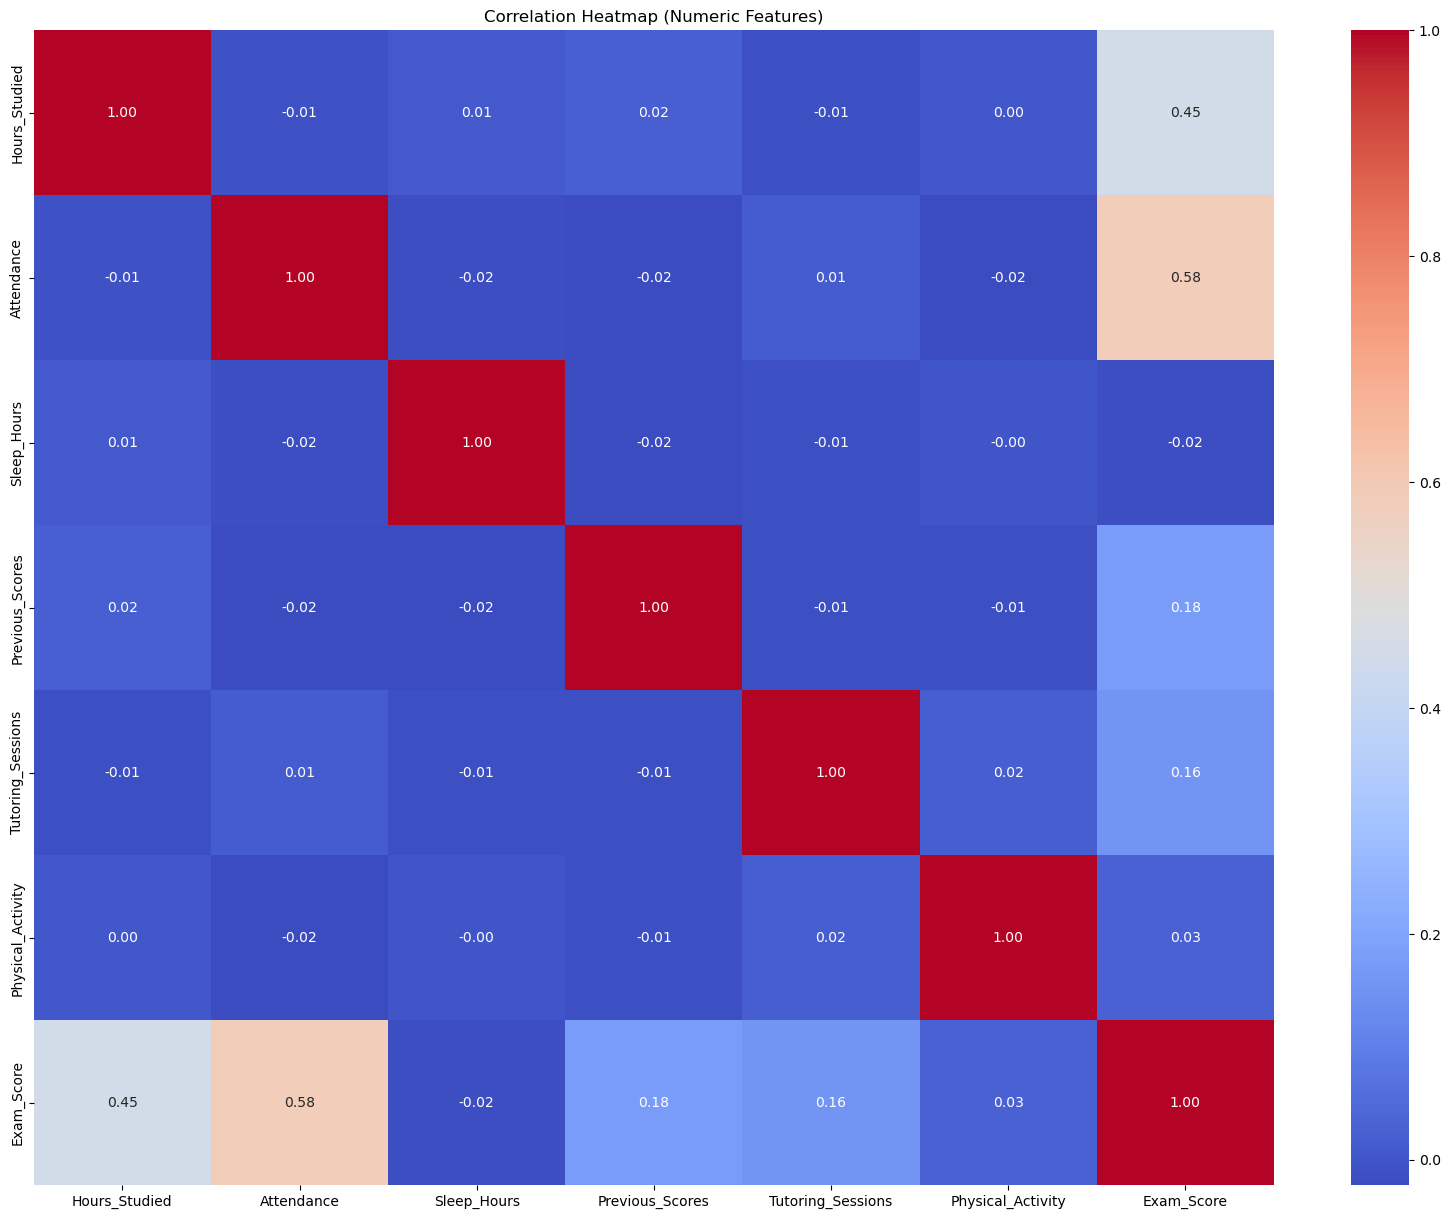

In [9]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Extract all correlations (excluding self-correlations)
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Remove duplicates (since corr(A,B) == corr(B,A))
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) < corr_pairs.index.get_level_values(1)]

# Filter positive and negative correlations separately
positive_corr = corr_pairs[corr_pairs > 0].sort_values(ascending=False)
negative_corr = corr_pairs[corr_pairs < 0].sort_values()

# Display results
print(" Positive Correlations:\n", positive_corr.head(20))
print("\n Negative Correlations:\n", negative_corr.head(20))


 Positive Correlations:
 Attendance         Exam_Score           0.581072
Exam_Score         Hours_Studied        0.445455
                   Previous_Scores      0.175079
                   Tutoring_Sessions    0.156525
                   Physical_Activity    0.027824
Hours_Studied      Previous_Scores      0.024846
Physical_Activity  Tutoring_Sessions    0.017733
Attendance         Tutoring_Sessions    0.014324
Hours_Studied      Sleep_Hours          0.010977
                   Physical_Activity    0.004624
dtype: float64

 Negative Correlations:
 Attendance         Physical_Activity   -0.022435
Previous_Scores    Sleep_Hours         -0.021750
Attendance         Previous_Scores     -0.020186
Exam_Score         Sleep_Hours         -0.017022
Attendance         Sleep_Hours         -0.015918
Hours_Studied      Tutoring_Sessions   -0.014282
Previous_Scores    Tutoring_Sessions   -0.013122
Sleep_Hours        Tutoring_Sessions   -0.012216
Physical_Activity  Previous_Scores     -0.011274
Att

In [11]:
# Get correlations with Exam Scores
corr_with_score = corr_matrix["Exam_Score"].sort_values(ascending=False)

# Display top positive and negative correlations
print("Top Positive Correlations with Exam_Score:")
print(corr_with_score.head(6))

print("\Top Negative Correlations with Exam_Score:")
print(corr_with_score.tail(10))

Top Positive Correlations with Exam_Score:
Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Name: Exam_Score, dtype: float64
\Top Negative Correlations with Exam_Score:
Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64


<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
C:\Users\TM\AppData\Local\Temp\ipykernel_33320\257946467.py:8: SyntaxWarning: invalid escape sequence '\T'
  print("\Top Negative Correlations with Exam_Score:")


## 4. Data cleaning that some group members have attempted to do

###Tomas: Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities

In [12]:
# catergorial values

df[["Hours_Studied","Attendance","Parental_Involvement","Access_to_Resources","Extracurricular_Activities"]].dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
dtype: object

In [13]:
for col in ["Parental_Involvement","Access_to_Resources","Extracurricular_Activities"]:
  print(col,df[col].unique())

Parental_Involvement ['Low' 'Medium' 'High']
Access_to_Resources ['High' 'Medium' 'Low']
Extracurricular_Activities ['No' 'Yes']


In [14]:
df["Parental_Involvement_encoded"] = df["Parental_Involvement"].map({
    "Low":0,
    "Medium":1,
    "High":2,
})
df["Parental_Involvement"].unique()
df[["Parental_Involvement", "Parental_Involvement_encoded"]].head()


,Parental_Involvement,Parental_Involvement_encoded
0,Low,0
1,Low,0
2,Medium,1
3,Low,0
4,Medium,1


In [15]:
df["Access_to_Resources_Encoded"] = df["Access_to_Resources"].map({
    "Low":0,
    "Medium":1,
    "High":2,
})
df[["Access_to_Resources","Access_to_Resources_Encoded"]].head()

,Access_to_Resources,Access_to_Resources_Encoded
0,High,2
1,Medium,1
2,Medium,1
3,Medium,1
4,Medium,1


In [16]:
df["Extracurricular_Activities_Encoded"] = df["Extracurricular_Activities"].map({
    "No":0,
    "Yes":1,
})
df[["Extracurricular_Activities","Extracurricular_Activities_Encoded"]].head()

,Extracurricular_Activities,Extracurricular_Activities_Encoded
0,No,0
1,No,0
2,Yes,1
3,Yes,1
4,Yes,1


In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
data_to_encode = ["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities"]

# One-hot encode
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[data_to_encode])

# Create new encoded DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(data_to_encode))

# Combine with original dataframe (dropping old columns)
df_encoded = pd.concat([df.drop(data_to_encode, axis=1), one_hot_df], axis=1)

print(one_hot_df.head(5))

   Parental_Involvement_High  Parental_Involvement_Low  \
0                        0.0                       1.0   
1                        0.0                       1.0   
2                        0.0                       0.0   
3                        0.0                       1.0   
4                        0.0                       0.0   

   Parental_Involvement_Medium  Access_to_Resources_High  \
0                          0.0                       1.0   
1                          0.0                       0.0   
2                          1.0                       0.0   
3                          0.0                       0.0   
4                          1.0                       0.0   

   Access_to_Resources_Low  Access_to_Resources_Medium  \
0                      0.0                         0.0   
1                      0.0                         1.0   
2                      0.0                         1.0   
3                      0.0                         1.0   


### Terry: Sleep_Hours , Previous_Scores , Motivation_Level , Internet_Access, Tutoring_Sessions

1. Encoding categorical columns

In [19]:
# Encode Internet Access and Tutoring Sessions
enc = OrdinalEncoder(
    categories=[["Low","Medium","High"], ["No","Yes"]],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

df[["Motivation_Level_ord","Internet_Access_ord"]] = enc.fit_transform(
    df[["Motivation_Level","Internet_Access"]]
)

In [20]:
# Numerical columns
df[
    ['Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions',
     'Motivation_Level_ord', 'Internet_Access_ord']
].describe()

,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Motivation_Level_ord,Internet_Access_ord
count,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,7.02906,75.070531,1.493719,0.906463,0.924474
std,1.46812,14.399784,1.230570,0.695798,0.264258
min,4.00000,50.000000,0.000000,0.000000,0.000000
25%,6.00000,63.000000,1.000000,0.000000,1.000000
50%,7.00000,75.000000,1.000000,1.000000,1.000000
75%,8.00000,88.000000,2.000000,1.000000,1.000000
max,10.00000,100.000000,8.000000,2.000000,1.000000


In [21]:
TARGET = "Exam_Score"
FEATURES = ["Sleep_Hours", "Previous_Scores", "Tutoring_Sessions"]
for feat in FEATURES:
    fig = px.scatter(
        df,
        x=feat,
        y=TARGET,
        opacity=0.7,
        title=f"{TARGET} vs {feat}",
        labels={feat: feat, TARGET: TARGET}
    )
    fig.show()

In [22]:
enc = OrdinalEncoder(
    categories=[["Low","Medium","High"], ["No","Yes"]],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

df[["Motivation_Level_ord","Internet_Access_ord"]] = enc.fit_transform(
    df[["Motivation_Level","Internet_Access"]]
)

2. Data Cleaning

Sleep Hour: Inspected after IQR , data is already cleaned

In [23]:
df["Sleep_Hours"].describe()

count    6607.00000
mean        7.02906
std         1.46812
min         4.00000
25%         6.00000
50%         7.00000
75%         8.00000
max        10.00000
Name: Sleep_Hours, dtype: float64

In [24]:
# IQR
Q1_SH = df["Sleep_Hours"].quantile(0.25)
Q3_SH = df["Sleep_Hours"].quantile(0.75)
IQR_NC = Q3_SH - Q1_SH
lower_bound_SH = Q1_SH - 1.5 * IQR_NC
upper_bound_SH = Q3_SH + 1.5 * IQR_NC

# Keep only values within the bounds
df = df[(df["Sleep_Hours"] >= lower_bound_SH) & (df["Sleep_Hours"] <= upper_bound_SH)]

In [25]:
df["Sleep_Hours"].describe()

count    6607.00000
mean        7.02906
std         1.46812
min         4.00000
25%         6.00000
50%         7.00000
75%         8.00000
max        10.00000
Name: Sleep_Hours, dtype: float64

Previous_Scores: Inspected after IQR , data is already cleaned

In [26]:
df["Previous_Scores"].describe()

count    6607.000000
mean       75.070531
std        14.399784
min        50.000000
25%        63.000000
50%        75.000000
75%        88.000000
max       100.000000
Name: Previous_Scores, dtype: float64

In [27]:
# IQR
Q1_PS = df["Previous_Scores"].quantile(0.25)
Q3_PS = df["Previous_Scores"].quantile(0.75)
IQR_PS = Q3_PS - Q1_PS
lower_bound_PS = Q1_PS - 1.5 * IQR_PS
upper_bound_PS = Q3_PS + 1.5 * IQR_PS

# Keep only values within the bounds
df = df[(df["Previous_Scores"] >= lower_bound_PS) & (df["Previous_Scores"] <= upper_bound_PS)]

In [28]:
df["Previous_Scores"].describe()

count    6607.000000
mean       75.070531
std        14.399784
min        50.000000
25%        63.000000
50%        75.000000
75%        88.000000
max       100.000000
Name: Previous_Scores, dtype: float64

Motivation_Level_ord: Capped from 0 to 2

In [29]:
df["Motivation_Level_ord"].describe()

count    6607.000000
mean        0.906463
std         0.695798
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Motivation_Level_ord, dtype: float64

In [30]:
df = df[(df["Motivation_Level_ord"] >= 0) & (df["Motivation_Level_ord"] <= 2)]

In [31]:
df["Motivation_Level_ord"].describe()

count    6607.000000
mean        0.906463
std         0.695798
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Motivation_Level_ord, dtype: float64

Internet_Access:

In [32]:
df["Internet_Access_ord"].describe()

count    6607.000000
mean        0.924474
std         0.264258
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Internet_Access_ord, dtype: float64

In [33]:
df = df[(df["Internet_Access_ord"] >= 0) & (df["Internet_Access_ord"] <= 1)]

In [34]:
df["Internet_Access_ord"].describe()

count    6607.000000
mean        0.924474
std         0.264258
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Internet_Access_ord, dtype: float64

Tutoring_Sessions:

In [35]:
df["Tutoring_Sessions"].describe()

count    6607.000000
mean        1.493719
std         1.230570
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Tutoring_Sessions, dtype: float64

In [36]:
# IQR
Q1_TS = df["Tutoring_Sessions"].quantile(0.25)
Q3_TS = df["Tutoring_Sessions"].quantile(0.75)
IQR_TS = Q3_TS - Q1_TS
lower_bound_TS = Q1_TS - 1.5 * IQR_TS
upper_bound_TS = Q3_TS + 1.5 * IQR_TS

# Keep only values within the bounds
df = df[(df["Tutoring_Sessions"] >= lower_bound_TS) & (df["Tutoring_Sessions"] <= upper_bound_TS)]

In [37]:
df["Tutoring_Sessions"].describe()

count    6177.000000
mean        1.292699
std         0.983741
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Tutoring_Sessions, dtype: float64

### Gokor:Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity

In [38]:

df['Family_Income'] = df['Family_Income'].replace({'Low': 0, 'Medium': 1, 'High': 2})
df['Teacher_Quality'] = df['Teacher_Quality'].replace({'Low': 0, 'Medium': 1, 'High': 2})
df['School_Type'] = df['School_Type'].replace({'Public': 0, 'Private': 1})



Gokor=df[['Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity']]

print(Gokor['School_Type'].describe())








count    6177.000000
mean        0.303707
std         0.459895
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: School_Type, dtype: float64


C:\Users\TM\AppData\Local\Temp\ipykernel_33320\3757673964.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\TM\AppData\Local\Temp\ipykernel_33320\3757673964.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\TM\AppData\Local\Temp\ipykernel_33320\3757673964.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sil

### Aram: Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender

In [39]:

# Print Table
df[['Learning_Disabilities', 'Parental_Education_Level',
    'Distance_from_Home', 'Gender']]

,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,No,High School,Near,Male
1,No,College,Moderate,Female
2,No,Postgraduate,Near,Male
3,No,High School,Moderate,Male
4,No,College,Near,Female
...,...,...,...,...
6602,No,High School,Near,Female
6603,No,High School,Near,Female
6604,No,Postgraduate,Near,Female
6605,No,High School,Far,Female


In [40]:
# Check Missing Values
df[['Learning_Disabilities', 'Parental_Education_Level',
    'Distance_from_Home', 'Gender']].isna().sum()

Learning_Disabilities        0
Parental_Education_Level    90
Distance_from_Home          64
Gender                       0
dtype: int64

In [41]:
# Handle Missing Values
for col in ['Learning_Disabilities', 'Parental_Education_Level',
            'Distance_from_Home', 'Gender']:
    if df[col].isna().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Filled missing values in {col} with '{mode_val}'")

Filled missing values in Parental_Education_Level with 'High School'
Filled missing values in Distance_from_Home with 'Near'


In [42]:
# Encode Categorical Columns
enc = OrdinalEncoder(
    categories=[
        ["No", "Yes"],                              # Learning_Disabilities
        ["High School", "College", "Postgraduate"], # Parental_Education_Level
        ["Near", "Moderate", "Far"],                # Distance_from_Home
        ["Male", "Female"]                          # Gender
    ],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

df[[
    "Learning_Disabilities_ord",
    "Parental_Education_Level_ord",
    "Distance_from_Home_ord",
    "Gender_ord"
]] = enc.fit_transform(df[[
    "Learning_Disabilities",
    "Parental_Education_Level",
    "Distance_from_Home",
    "Gender"
]])

In [43]:
# Check Missing Values (Again)
df[['Learning_Disabilities_ord', 'Parental_Education_Level_ord',
    'Distance_from_Home_ord', 'Gender_ord']].isna().sum()

Learning_Disabilities_ord       0
Parental_Education_Level_ord    0
Distance_from_Home_ord          0
Gender_ord                      0
dtype: int64

In [44]:
# Show Transformed Column Values
df[[
    "Learning_Disabilities_ord",
    "Parental_Education_Level_ord",
    "Distance_from_Home_ord",
    "Gender_ord"
]].describe()

,Learning_Disabilities_ord,Parental_Education_Level_ord,Distance_from_Home_ord,Gender_ord
count,6177.000000,6177.000000,6177.000000,6177.000000
mean,0.103448,0.695645,0.503804,0.423507
std,0.304568,0.780035,0.671419,0.494154
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000
max,1.000000,2.000000,2.000000,1.000000


In [45]:
# Print Box Plots
TARGET = "Exam_Score"
CATEGORICALS = [
    "Learning_Disabilities",
    "Parental_Education_Level",
    "Distance_from_Home",
    "Gender"
]

for cat in CATEGORICALS:
    # Plot box plot
    fig = px.box(
        df,
        x=cat,
        y=TARGET,
        title=f"{TARGET} by {cat}",
        points="all"
    )
    fig.show()

# Calculate Descriptive Stats
    stats = df.groupby(cat)[TARGET].describe()[['min', '25%', '50%', '75%', 'max']]
    print(f"\nStatistics for {TARGET} by {cat}:\n")
    print(stats)
    print("\n" + "-"*60 + "\n")



Statistics for Exam_Score by Learning_Disabilities:

                        min   25%   50%   75%    max
Learning_Disabilities                               
No                     55.0  65.0  67.0  69.0  100.0
Yes                    57.0  63.0  66.0  68.0   89.0

------------------------------------------------------------




Statistics for Exam_Score by Parental_Education_Level:

                           min   25%   50%   75%    max
Parental_Education_Level                               
College                   56.0  65.0  67.0  69.0  100.0
High School               55.0  64.0  67.0  69.0   99.0
Postgraduate              57.0  66.0  68.0  70.0   98.0

------------------------------------------------------------




Statistics for Exam_Score by Distance_from_Home:

                     min   25%   50%   75%    max
Distance_from_Home                               
Far                 56.0  64.0  66.0  68.0   99.0
Moderate            57.0  65.0  67.0  69.0   98.0
Near                55.0  65.0  67.0  70.0  100.0

------------------------------------------------------------




Statistics for Exam_Score by Gender:

         min   25%   50%   75%    max
Gender                               
Female  57.0  65.0  67.0  69.0  100.0
Male    55.0  65.0  67.0  69.0   99.0

------------------------------------------------------------



# Check-In 2

# Model Selection

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
cols = ['Hours_Studied','Attendance',
    'Parental_Involvement_encoded','Access_to_Resources_Encoded',
    'Extracurricular_Activities_Encoded',
    'Sleep_Hours','Previous_Scores','Motivation_Level_ord',
    'Internet_Access_ord','Tutoring_Sessions']
x = df[cols]
# single variable that is numeric to model for regression
y = df["Exam_Score"]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42) 

In [49]:
LRmodel = LinearRegression()
LRmodel.fit(x_train,y_train)
y_pred = LRmodel.predict(x_test)


In [50]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [51]:
print(f"Model Performance:")
print(f"RMSE:{rmse:.2f}")
print(f"R²:   {r2:.2f}")

Model Performance:
RMSE:2.07
R²:   0.70


In [52]:
import matplotlib.pyplot as plt

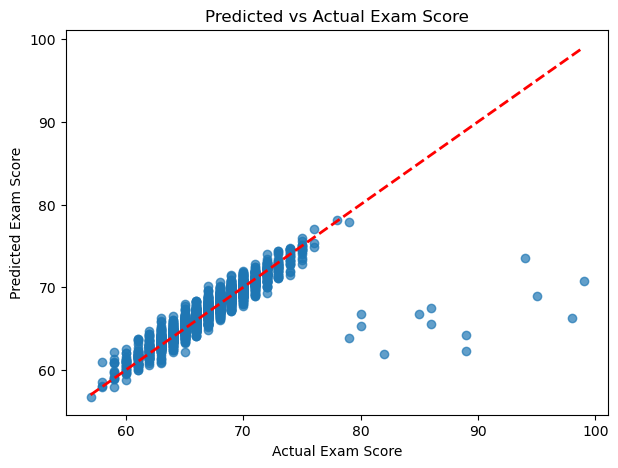

In [53]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test,y_pred,alpha=0.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--",linewidth=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Predicted vs Actual Exam Score")
plt.show()

Model Evaluation
* the r2 score is 0.70 and the rmse was at 2.07
* there is a 70% variance in students exam scores due to selected variables such as attendance, study hours, motivation level, and tutoring sessions
* no strong evidence of overfitting b/c since we get reasonable high accuracy
* somewhat evidence of underfitting b/c we get exams scores predicition at 70%

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler',StandardScaler()),("lr",LinearRegression())])
pipeline.fit(x_train,y_train)
y_pred_scaled = pipeline.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_scaled))
r2 = r2_score(y_test,y_pred_scaled)
print(f"Scaled Model Performance:\nRMSE: {rmse:.2f}\nR²: {r2:.2f}")


Scaled Model Performance:
RMSE: 2.07
R²: 0.70


Ridge regularization technique
* both ridge and lasso didn't overly effect the model since lambda wasn't penalizing the model
* if lambda was set higher for lasso then the r2 value would be much lower approximately at 0.43 which would show it would supress useful data

In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10.0)
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
r2_ridge = r2_score(y_test,y_pred_ridge)
print(f"Ridge Model Performance:\nRMSE: {rmse_ridge:.2f}\nR²: {r2_ridge:.2f}")


Ridge Model Performance:
RMSE: 2.07
R²: 0.70


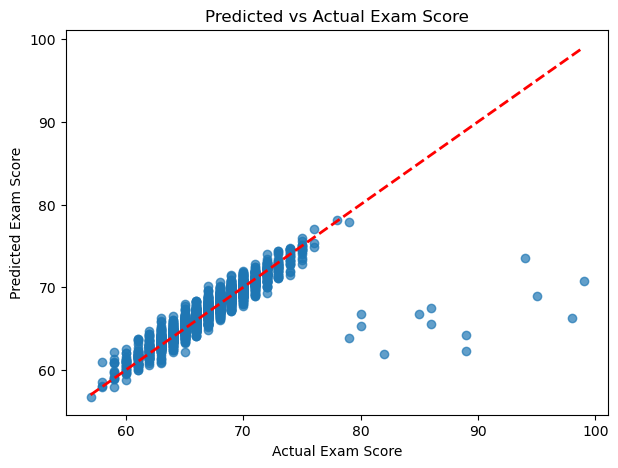

In [56]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test,y_pred,alpha=0.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--",linewidth=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Predicted vs Actual Exam Score")
plt.show()

In [57]:
from sklearn.linear_model import Lasso
ridge_pipe = Pipeline([('scalar',StandardScaler()),('ridge',Ridge(alpha=10))])

ridge_pipe.fit(x_train,y_train)
ridge_pred = ridge_pipe.predict(x_test)

print("Ridge Regularization")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, ridge_pred)):.2f}")
print(f"R²:   {r2_score(y_test, ridge_pred):.2f}")


lasso_pipe = Pipeline([('scalar',StandardScaler()),('Lasso',Lasso(alpha=1))])
lasso_pipe.fit(x_train,y_train)
lasso_pred = lasso_pipe.predict(x_test)
print("\nLasso Regularization")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lasso_pred)):.2f}")
print(f"R²:   {r2_score(y_test, lasso_pred):.2f}")

Ridge Regularization
RMSE: 2.07
R²:   0.70

Lasso Regularization
RMSE: 2.87
R²:   0.43
